# Stereo Vision
This assignment focuses on implementing and analyzing stereo vision algorithms. The goal is to compute disparity maps between left and right images using two methods:
1. **Block Matching** with Sum of Absolute Differences (SAD) and Sum of Squared Differences (SSD).
2. **Dynamic Programming** for optimal scanline alignment.
The results will be evaluated for different window sizes and compared for accuracy and performance.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

left = cv2.imread('stereo_materials/l3.png', cv2.IMREAD_GRAYSCALE)
right = cv2.imread('stereo_materials/r3.png', cv2.IMREAD_GRAYSCALE)

window_sizes = [1, 5, 9]

## 1.1 Stereo Vision: Block Matching
**Objective**

Compute disparity maps by matching pixels between left (I_l) and right (I_r) images using:

* **SAD (Sum of Absolute Differences)**

* **SSD (Sum of Squared Differences)**

**Parameters:**

* Window sizes: `w = 1, 5, 9`

* Output: 6 disparity maps (3 window sizes × 2 cost functions).

**Approach**
1. For each pixel in `I_l`, compare with pixels in `I_r` along the same row.

2. Calculate SAD and SSD costs for each window size.

3. Assign the disparity with the minimum cost.

In [2]:
def compute_sad(left, right, window_size):
    height, width = left.shape
    disparity_map = np.zeros((height, width), np.uint8)
    offset = window_size // 2
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            best_offset = 0
            min_sad = float('inf')
            for d in range(x):
                if x - d - offset < 0:
                    continue
                sad = np.sum(np.abs(
                    left[y-offset:y+offset+1, x-offset:x+offset+1] -
                    right[y-offset:y+offset+1, (x-d)-offset:(x-d)+offset+1]
                ))
                if sad < min_sad:
                    min_sad = sad
                    best_offset = d
            disparity_map[y, x] = int(np.clip(best_offset, 0, 255))
    return disparity_map

In [3]:
def compute_ssd(left, right, window_size):
    height, width = left.shape
    disparity_map = np.zeros((height, width), np.uint8)
    offset = window_size // 2
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            best_offset = 0
            min_ssd = float('inf')
            for d in range(x):
                if x - d - offset < 0:
                    continue
                ssd = np.sum((
                    left[y-offset:y+offset+1, x-offset:x+offset+1] -
                    right[y-offset:y+offset+1, (x-d)-offset:(x-d)+offset+1]
                )**2)
                if ssd < min_ssd:
                    min_ssd = ssd
                    best_offset = d
            disparity_map[y, x] = np.clip(best_offset, 0, 255)
    return disparity_map

In [4]:
def plot_disparity_maps(left_img, right_img, window_sizes):
    """
    Compute and plot SAD/SSD disparity maps for different window sizes.
    """
    num_sizes = len(window_sizes)
    plt.figure(figsize=(15, 5 * num_sizes))  # Adjust figure size dynamically
    
    for idx, w in enumerate(window_sizes, 1):
        # Compute disparity maps
        sad_map = compute_sad(left_img, right_img, w)
        ssd_map = compute_ssd(left_img, right_img, w)
        
        # Plot SAD
        plt.subplot(num_sizes, 2, 2*idx - 1)
        plt.imshow(sad_map, cmap='gray')
        plt.colorbar(label='Disparity')
        plt.title(f'SAD Disparity (w={w})')
        plt.axis('off')
        
        # Plot SSD
        plt.subplot(num_sizes, 2, 2*idx)
        plt.imshow(ssd_map, cmap='gray')
        plt.colorbar(label='Disparity')
        plt.title(f'SSD Disparity (w={w})')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

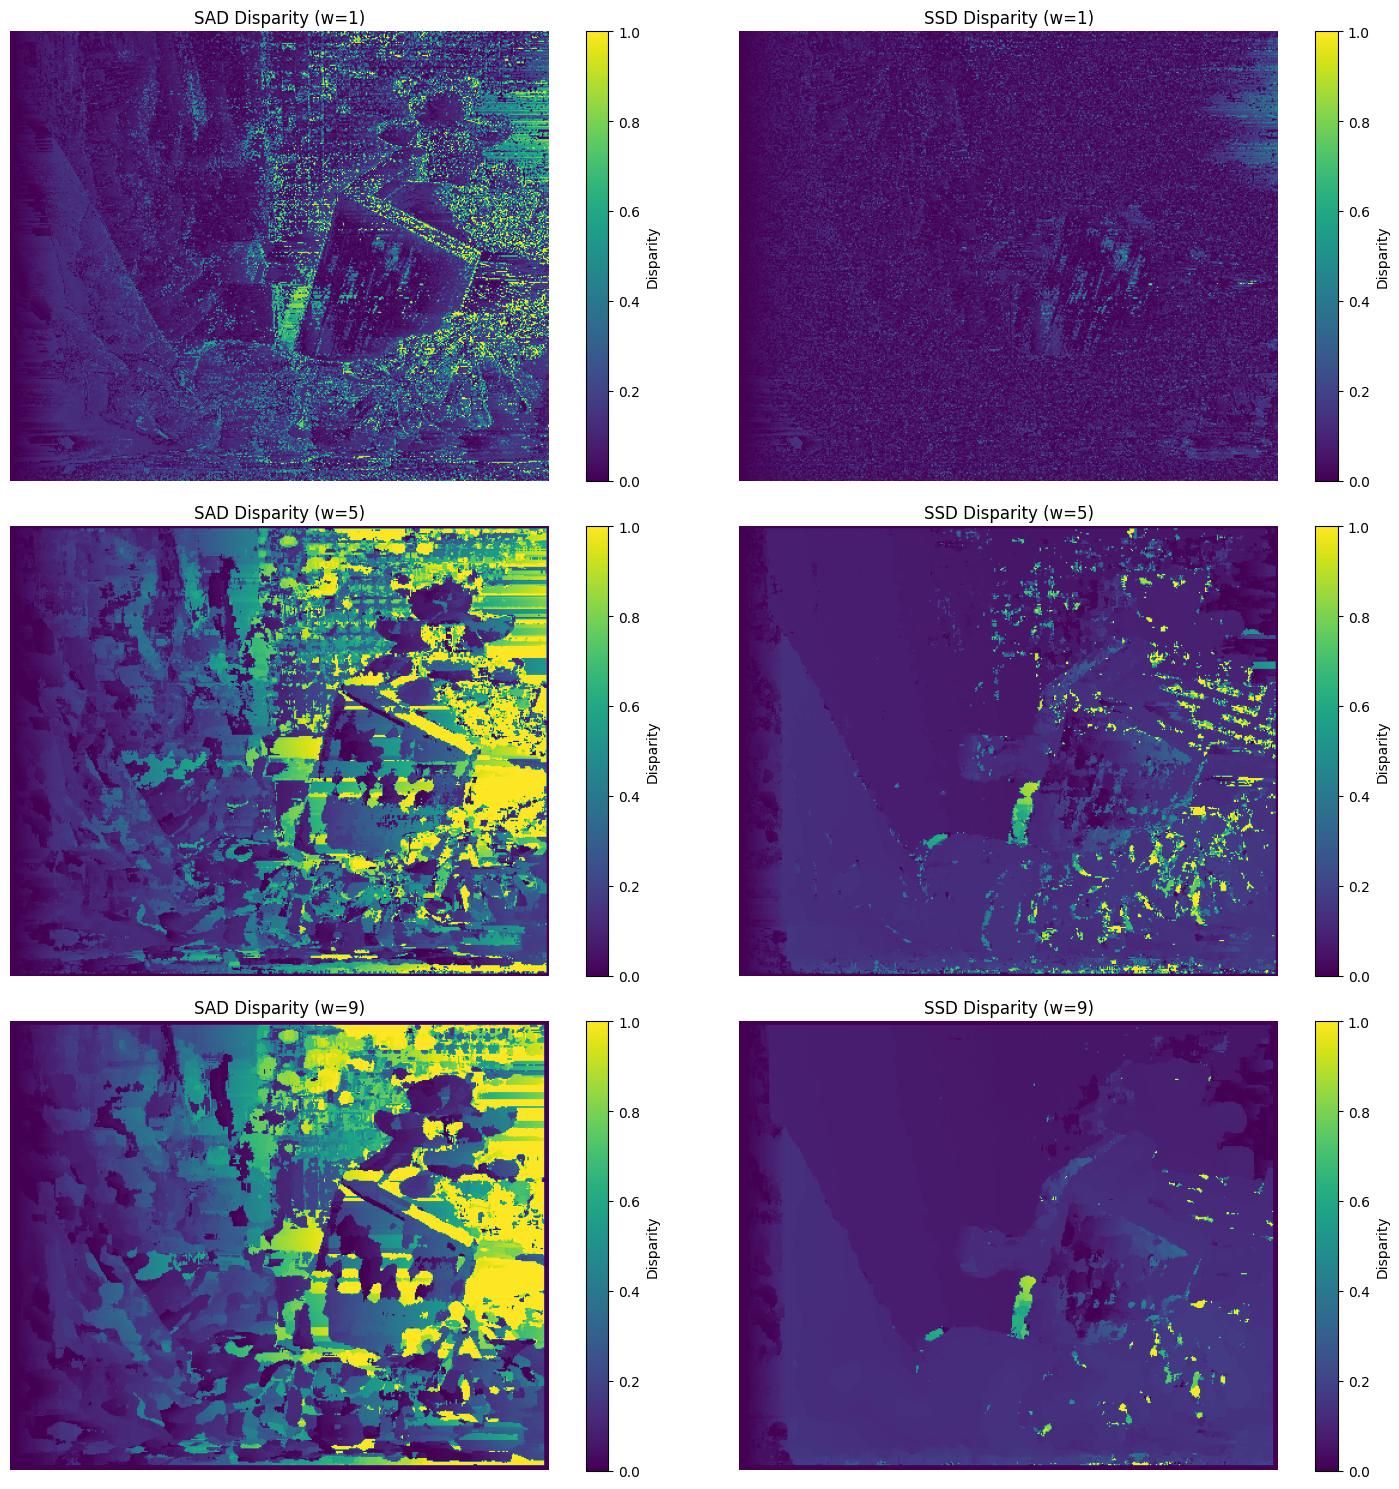

In [5]:
plot_disparity_maps(left, right, window_sizes)

## 1.1.2 Stereo Vision: Dynamic Programming
**Objective**
Compute disparity maps using dynamic programming to minimize the alignment cost of scanlines.

**Cost Definitions:**

* Matching cost: `d_ij = (I_l(i) - I_r(j))^2 / σ^2` (σ = 2)

* Occlusion cost: `c_0 = 1`

**Algorithm Steps**
1. Initialize cost matrix `D` with `D(1,1) = d_11`.

2. Fill `D(i,j)` using the recurrence

3. Backtrack from `D(N,N)` to `(1,1)` to determine disparities.

**Output:**

* Left and right disparity maps with occlusions marked as `0`.

## 1.2 Bonus: Scanline Alignment Visualization
Plot the alignment path for a single scanline:

* **Diagonal line:** Pixels matched.

* **Vertical line:** Pixel skipped in `I_l`.

* **Horizontal line:** Pixel skipped in `I_r`.

## **Results and Analysis**
**Block Matching Observations**
* Larger window sizes (`w=5,9`) may smooth disparities but lose fine details.

* SSD penalizes large errors more than SAD.

**Dynamic Programming Observations**
* Handles occlusions better than block matching.

* Computational cost is higher due to `O(N^2)` matrix operations.

## Conclusion
This assignment demonstrated the trade-offs between block matching (efficiency) and dynamic programming (accuracy) for disparity estimation.